## Generating invariants

In this notebook we play with generating rotation invariants in a spherical harmonic basis

In [1]:
import numpy as np
import sympy

import milad
from milad.descriptors import invariants_generation
from milad import utils

sympy.init_printing() # Nice printing

Let's create some symbols, we'll use $\Omega_{nl}^m$ as the symbol for our moments (or expansions coefficients)

In [2]:
O = sympy.IndexedBase('\Omega', complex=True)  # My Zernike moments
m = sympy.IndexedBase('m', real=True) # Geometric moment symbols

### Invariants of single complex moments

These are the most simple invariants that correspond to $l = 0$ i.e. the sphere.  Let's get the first few of these.

In [3]:
invariants_generation.invariants_single_complex_moments(O, 10)

We see that all even $n$ with $l = m = 0$ are rotation invariants.

### Invariants of a complex form

Now let's find invariants that are a single complex form, e.g. $c_n(l, l)_0^0$

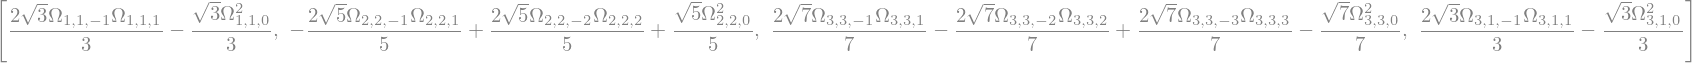

In [4]:
invs = invariants_generation.invariants_single_complex_moment_forms(O, 3)
invs

2


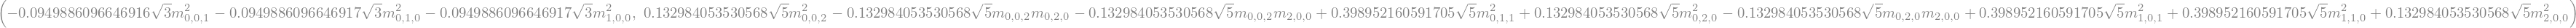

In [15]:
max_order = 2
symbols_array = np.array(milad.analytic.create_array(m, (max_order + 1,) * 3), dtype=object)
geom_moments = milad.geometric.GeometricMoments(symbols_array)
zernike_from_geometric = milad.zernike.from_geometric_moments(max_order, geom_moments)
invs = invariants_generation.invariants_single_complex_moment_forms(zernike_from_geometric, max_order)
print(len(invs))
tuple(map(sympy.expand, invs))

In [27]:
(zernike_from_geometric[2, 2, -1]*zernike_from_geometric[2, 2, 1]).expand()

### Products of a form and a complex moment

These come from $c_n(l, l')_j^0 c_{s'}$

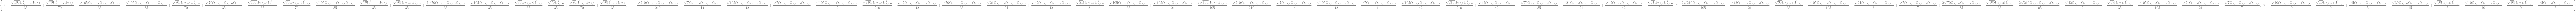

In [6]:
dict(enumerate(map(sympy.expand, invariants_generation.invariants_moment_form_complex_moment(O, 3))))

### Products of two complex forms


These are given by $c_n(l, l')_j^0 c_{n'}(l'', l''')_j^0$

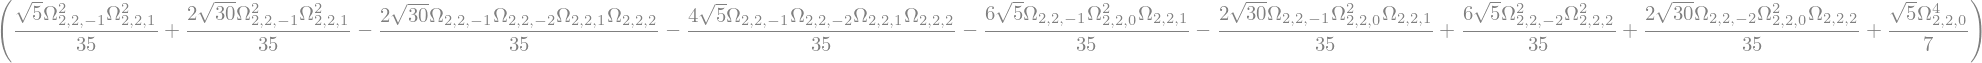

In [31]:
tuple(map(sympy.expand, invariants_generation.invariants_two_moment_forms(O, 2)))

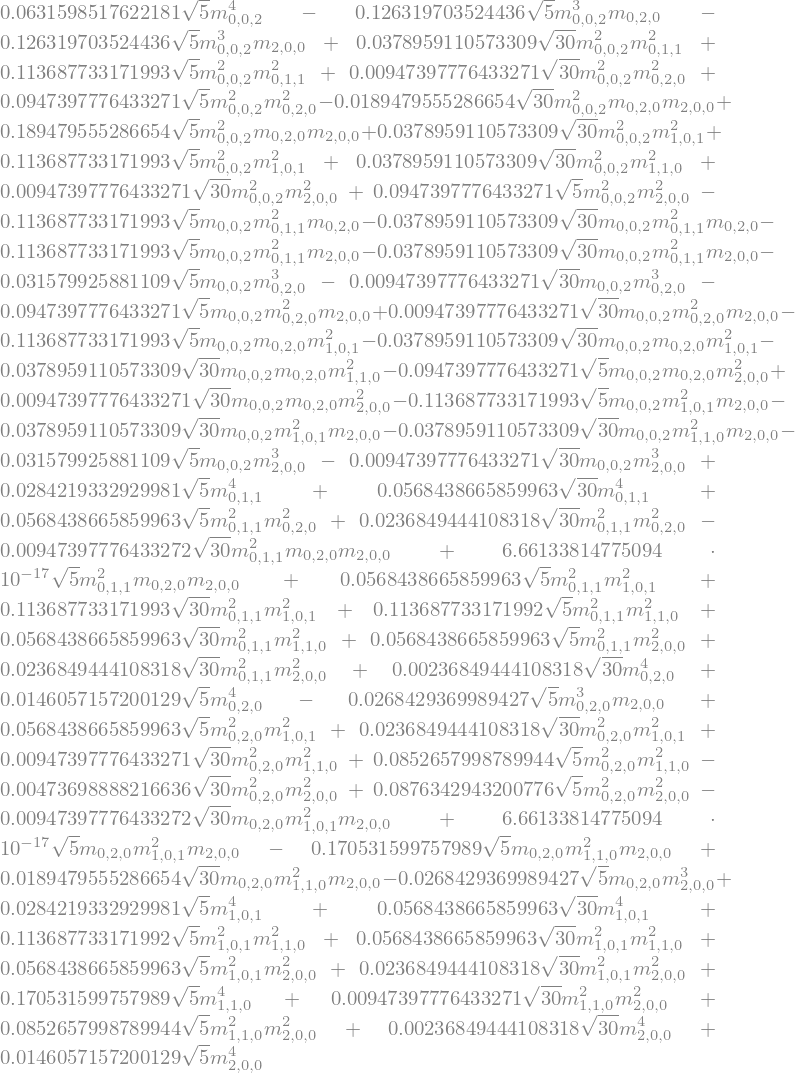

In [34]:
invariants_generation.invariants_two_moment_forms(zernike_from_geometric, 2)[0].expand()

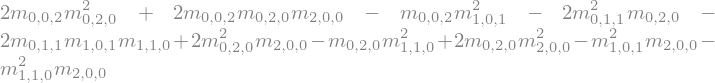

In [38]:
I = sympy.IndexedBase('I', real=True) # Inertial tensor components
I = sympy.Matrix([
    [m[0,2,0] + m[0,2,0], -m[1,1,0], -m[1,0,1]],
    [-m[1,1,0], m[2,0,0] + m[0,0,2], -m[0,1,1]],
    [-m[1,0,1], -m[0,1,1], m[2,0,0] + m[0,2,0]],
])
I.det()